In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

In [109]:
# Define sample data set
x = np.array([1, 2, 5, 7])

data = {'x': x, 
        'y': np.zeros(x.size),
        'cluster': np.arange(x.size) + 1, 
        'color': np.arange(x.size)}

# Clustering
## Hierarchical Clustering
### Hierarchical Agglomerative Clustering

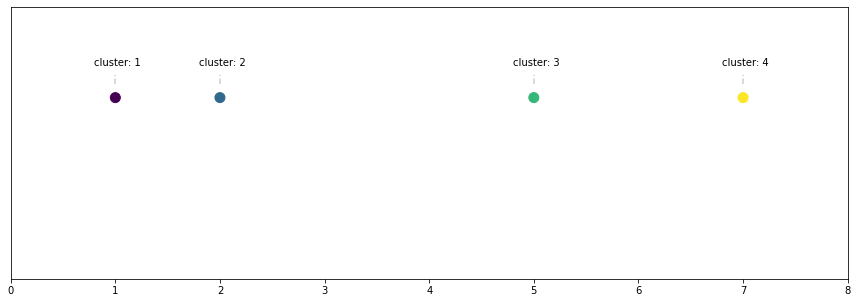

In [110]:
# Show the data set
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['x'], data['y'], s=100, marker='o', c=data['color']) #  edgecolors='#DB5461',

for i in range(0,len(data['x'])):
    ax.plot([data['x'][i], data['x'][i]], [0.15, 0.25], c='k', linestyle='--', alpha=0.2)
    ax.text(data['x'][i]-0.2, 0.35, 'cluster: ' + str(data['cluster'][i]))
ax.set_ylim([-2,1])
ax.set_xlim([0,8])
ax.get_yaxis().set_visible(False)
fig.savefig('HAC_2.png', bbox_inches='tight', transparent=True)

In [111]:
def prox_mtx(x):
    """
    # Get all combinations from a 1d-array by using a small hack
    m, n = np.meshgrid(data['x'], data['x'])
    # Based on all combinations, we determine the difference. Thus, we get a distance, or proximity matrix
    D = np.triu(np.abs(m-n))
    """
    mtx = np.triu(np.abs(x[..., np.newaxis] - x))
    return mtx, np.nanargmin(np.where(mtx != 0, mtx, np.nan).ravel())

In [112]:
distances, idx = prox_mtx(data['x'])
distances = distances[0,:]
print(distances)

[0 1 4 6]


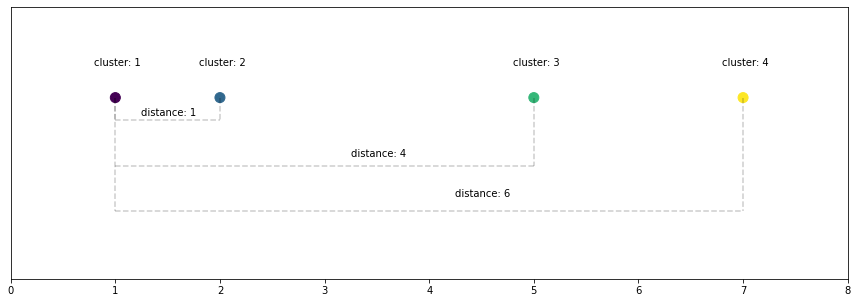

In [32]:
# Show the data set
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['x'], data['y'], s=100, marker='o', c=data['color'])

for i, val in enumerate(data['x']):
    if i == 0:
        ax.plot([val, val], [0, -0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
    else:   
        ax.plot([val, val], [0, 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
        ax.text((1.25 + distances[i]//2) , 0.25-(i*0.45) , 'distance: ' + str(distances[i]))

    
    ax.text(val-0.2, 0.35, 'cluster: ' + str(data['cluster'][i]))
    
    ax.plot([data['x'][0], data['x'][i]], [0.25-(i*0.5), 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
    
ax.plot([1, 1], [0, 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
ax.set_ylim([-2,1])
ax.set_xlim([0,8])
ax.get_yaxis().set_visible(False)
fig.savefig('HAC_3.png', bbox_inches='tight', transparent=True)

In [33]:
# Assign the closest element to 0 the same cluster id

In [35]:
# Get new data consists of the mean of the first cluster and the rest
x = np.append([(data['x'][0] + data['x'][idx]) / 2], np.delete(x, [0, idx]))

In [ ]:
# Reduce the cluster id 
#data['cluster'] = np.unique(data['cluster'])

In [43]:
data['cluster'] = ['1|2', '1|2', '3' , '4']
data['color'] = [0, 0, 2, 3]

### Merging the first cluster

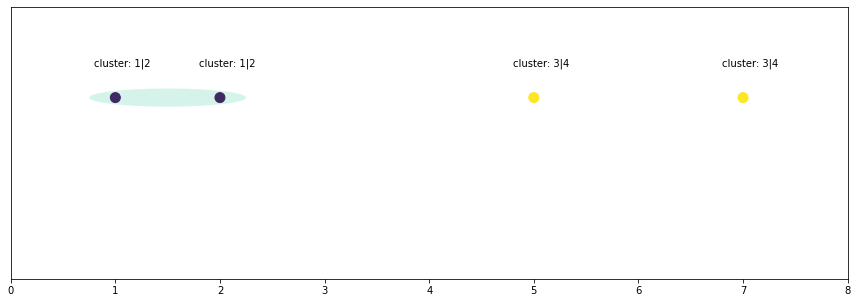

In [73]:
# Show the data set
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['x'], data['y'], s=100, marker='o', c=data['color'])

for i, val in enumerate(data['x']):
    
    ax.text(val-0.2, 0.35, 'cluster: ' + str(data['cluster'][i]))
    
    #ax.plot([data['x'][0], data['x'][i]], [0.25-(i*0.5), 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
    
#ax.plot([1, 1], [0, 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)

e = patches.Ellipse((1.5, 0), 1.5, 0.2, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.18728872, 0.77332671, 0.61644898])

ax.add_patch(e)

ax.set_ylim([-2,1])
ax.set_xlim([0,8])
ax.get_yaxis().set_visible(False)
fig.savefig('HAC_4.png', bbox_inches='tight', transparent=True)

In [74]:
data['cluster'] = ['1|2', '1|2', '3|4' , '3|4']
data['color'] = [0, 0, 2, 2]

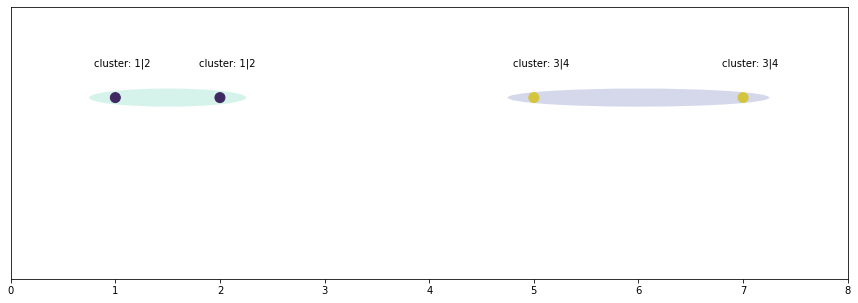

In [75]:
# Show the data set
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['x'], data['y'], s=100, marker='o', c=data['color'])

for i, val in enumerate(data['x']):
    
    ax.text(val-0.2, 0.35, 'cluster: ' + str(data['cluster'][i]))
    
    #ax.plot([data['x'][0], data['x'][i]], [0.25-(i*0.5), 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)
    
#ax.plot([1, 1], [0, 0.25-(i*0.5)], c='k', linestyle='--', alpha=0.2)

e = patches.Ellipse((1.5, 0), 1.5, 0.2, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.18728872, 0.77332671, 0.61644898])
ax.add_patch(e)

e = patches.Ellipse((6, 0), 2.5, 0.2, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.19, 0.25, 0.62])
ax.add_patch(e)

ax.set_ylim([-2,1])
ax.set_xlim([0,8])
ax.get_yaxis().set_visible(False)
fig.savefig('HAC_5.png', bbox_inches='tight', transparent=True)

In [126]:
data['cluster'] = ['1|4', '1|4', '1|4' , '1|4']
data['color'] = [5, 5, 5, 5]

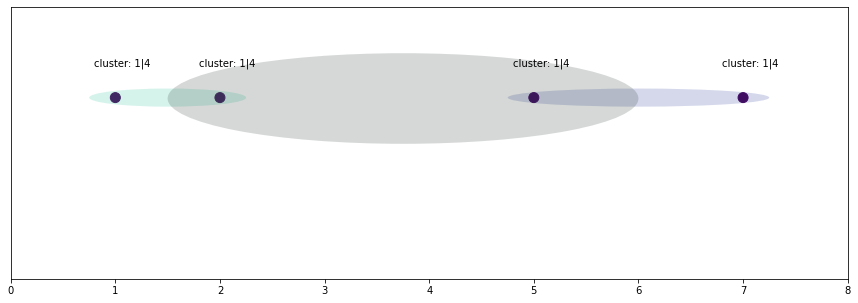

In [127]:
# Show the data set
fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(data['x'], data['y'], s=100, marker='o', c=data['color'])

for i, val in enumerate(data['x']):
    
    ax.text(val-0.2, 0.35, 'cluster: ' + str(data['cluster'][i]))

e = patches.Ellipse((1.5, 0), 1.5, 0.2, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.18728872, 0.77332671, 0.61644898])
ax.add_patch(e)

e = patches.Ellipse((6, 0), 2.5, 0.2, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.19, 0.25, 0.62])
ax.add_patch(e)

e = patches.Ellipse((3.75, -0.01), 4.5, 1, linewidth=0.5, fill=True, alpha=0.2)
e.set_facecolor([0.19, 0.25, 0.22])
ax.add_patch(e)

ax.set_ylim([-2,1])
ax.set_xlim([0,8])
ax.get_yaxis().set_visible(False)
fig.savefig('HAC_6.png', bbox_inches='tight', transparent=True)

# Dendrogram

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

distances, _ = prox_mtx(data['x'])

linked = linkage(distances, 'complete')

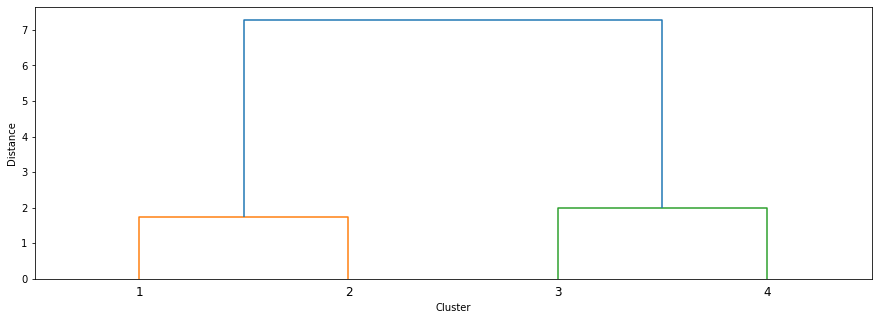

In [142]:
labelList = range(1, 11)

fig, ax = plt.subplots(figsize=(15,5))
dendrogram(linked)
ax.set_xticklabels(np.arange(x.size)+1)
#ax.get_yaxis().set_visible(False)
ax.set_xlabel('Cluster')
ax.set_ylabel('Distance')
fig.savefig('HAC_7.png', bbox_inches='tight', transparent=True)

In [90]:
x

array([1.5, 5. , 7. ])